# **Customer Churn Analysis**

--




##🔹 Project Goal
Predict which customers are likely to churn (leave) and identify key factors influencing churn to help the business reduce customer attrition.

##📌 Tools & Skills Used
 ### ✔ Python (Pandas, NumPy, Matplotlib/Seaborn, Scikit-learn)
 ### ✔ Exploratory Data Analysis (EDA)
 ### ✔ Feature Engineering
 ### ✔ Machine Learning (Logistic Regression, Random Forest, XGBoost)
 ### ✔ Model Evaluation & Business Insights

#Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📂  Data Loading & Initial Exploration

In [ ]:
customer_churn_data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
#checking for nulls
print(customer_churn_data.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
customer_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Initial Observations:
- TotalCharges is stored as an object (should be numeric)

- Some binary columns (SeniorCitizen, Partner, etc.) need encoding

- customerID is a unique identifier (can be dropped).

# 📊  Data Cleaning & Preprocessing

In [ ]:
# converting TotalCharges into numeric
customer_churn_data['TotalCharges'] = pd.to_numeric(customer_churn_data['TotalCharges'],errors='coerce')

# filling nulls with median
customer_churn_data['TotalCharges'] = customer_churn_data['TotalCharges'].fillna(customer_churn_data['TotalCharges'].median())

#📈 Exploratory Data Analysis (EDA)

In [ ]:
customer_churn_data.drop(columns=['customerID'],inplace=True)

In [ ]:
# Churn Distribution
print(round(customer_churn_data['Churn'].value_counts()/ len(customer_churn_data)*100))

Churn
No     73.0
Yes    27.0
Name: count, dtype: float64


 - Observation: 73% stayed, 27% churned -- Imbalanced dataset

## Factors Influencing Churn

Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48


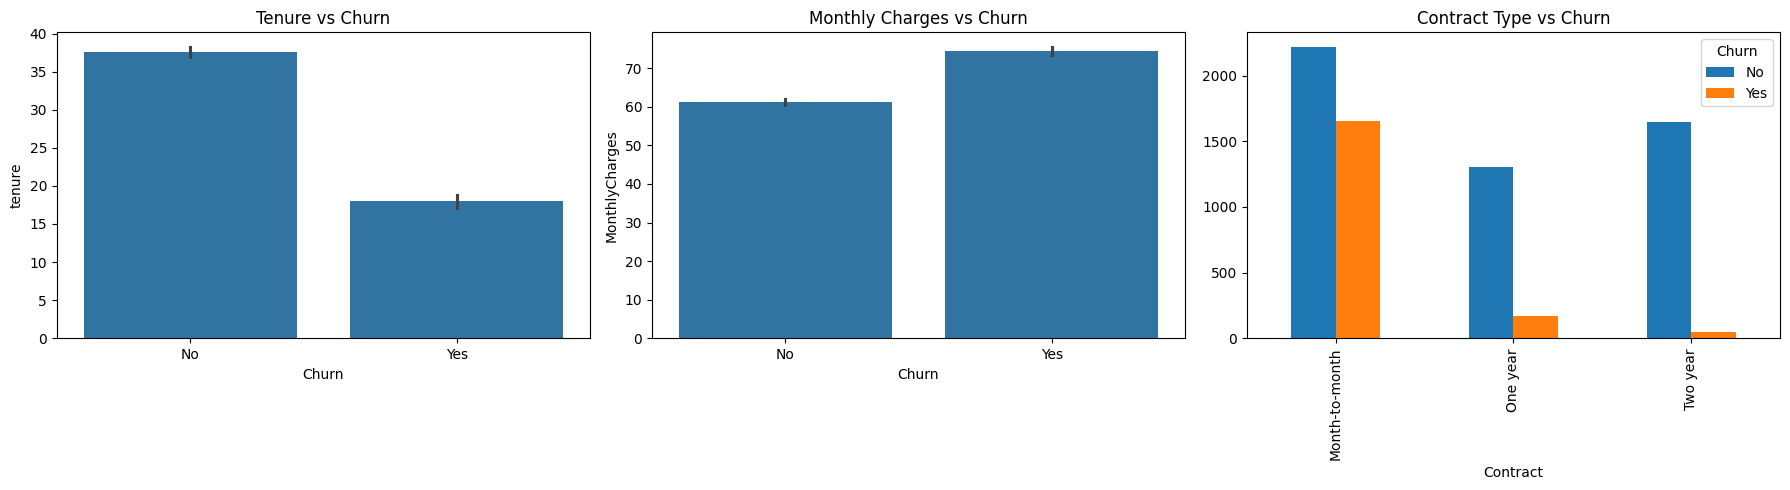

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

#  Tenure vs Churn
sns.barplot(x='Churn', y='tenure', data=customer_churn_data, ax=axes[0])
axes[0].set_title('Tenure vs Churn')

# Monthly Charges vs Churn
sns.barplot(x='Churn', y='MonthlyCharges', data=customer_churn_data, ax=axes[1])
axes[1].set_title('Monthly Charges vs Churn')

# Contract Type vs Churn
print(pd.crosstab(customer_churn_data['Contract'], customer_churn_data['Churn']))
pd.crosstab(customer_churn_data['Contract'], customer_churn_data['Churn']).plot(kind='bar', ax=axes[2])
axes[2].set_title('Contract Type vs Churn')

plt.tight_layout()
plt.show()


### Insights:
- Customers with shorter tenure are more likely to churn.
-Customers with higher monthly charges churn more.
- Customers on monthly contracts churn more than those on yearly contracts.

# 🤖 Feature Engineering & Model Building

In [ ]:
customer_churn_data['Churn'] = customer_churn_data['Churn'].replace({'No' : 0,'Yes':1})

<ipython-input-172-80fe9706938c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_churn_data['Churn'] = customer_churn_data['Churn'].replace({'No' : 0,'Yes':1})


In [ ]:
# feature encoding on categorical data
Encoded_data  = pd.get_dummies(customer_churn_data,columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'])

In [ ]:
x = Encoded_data.drop('Churn',axis=1).values
y = Encoded_data.iloc[:,3].values
print(x)

[[1 29.85 29.85 ... False True False]
 [34 56.95 1889.5 ... False False True]
 [2 53.85 108.15 ... False False True]
 ...
 [11 29.6 346.45 ... False True False]
 [4 74.4 306.6 ... False False True]
 [66 105.65 6844.5 ... False False False]]


In [ ]:
# Train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

### -- Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)
print(pd.DataFrame({'Actual' : y_test, 'Predictions' : y_pred}))

      Actual  Predictions
0          0            0
1          0            0
2          1            1
3          1            1
4          1            1
...      ...          ...
1404       1            0
1405       0            0
1406       0            0
1407       1            1
1408       1            1

[1409 rows x 2 columns]


## --XGboost

In [ ]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

## --Random Forest

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy_score for logistic regression -- ', accuracy_score(y_pred,y_test))

Accuracy_score for logistic regression --  0.8055358410220014


In [ ]:
print('Accuracy_score for XG boost -- ', accuracy_score(y_pred_xgb,y_test))

Accuracy_score for XG boost --  0.794889992902768


In [ ]:
print('Accuracy_score for Random Forest -- ', accuracy_score(y_pred_rf,y_test))

Accuracy_score for Random Forest --  0.7963094393186657


 ### Business Recommendations
  #### --- Based on the insights :
    - For High-Risk Customers  :
    - Offer discounted long-term contracts.
     - Personalized retention offers.
     - For Customers Without Tech Support/Online Security:
       - Promote security add-ons for ex - offer free online security for 6 months!
      - Proactive support: Identify struggling users and offer help.

 #### For Month-to-Month Subscribers:
       - Incentivize annual contracts